# Analysis of LMD 2012

In [2]:
# Use the latest functions:
require(ggplot2)
require(devtools)
load_all("..")
# OR the installed package:
# require(lucas)
require(foreign)

Loading lucas


## Load some data

In [79]:
countries <- get_lmd_overview()$code[get_lmd_overview()$x2012]
lmddir <- system.file("gitignore", package="lucas")
fname_rds <- file.path(lmddir, "LMD2012.RDS")

if (!file.exists(fname_rds)) {
    lmd <- bind_lmd(lmddir, countries, year=2012)
    saveRDS(lmd, fname_rds)
} else {lmd <- readRDS(fname_rds)}

In [4]:
lulc_matrix <- table(lmd$LC1, lmd$LU1)

Or as data frame without the zero cases:

Loading lucas


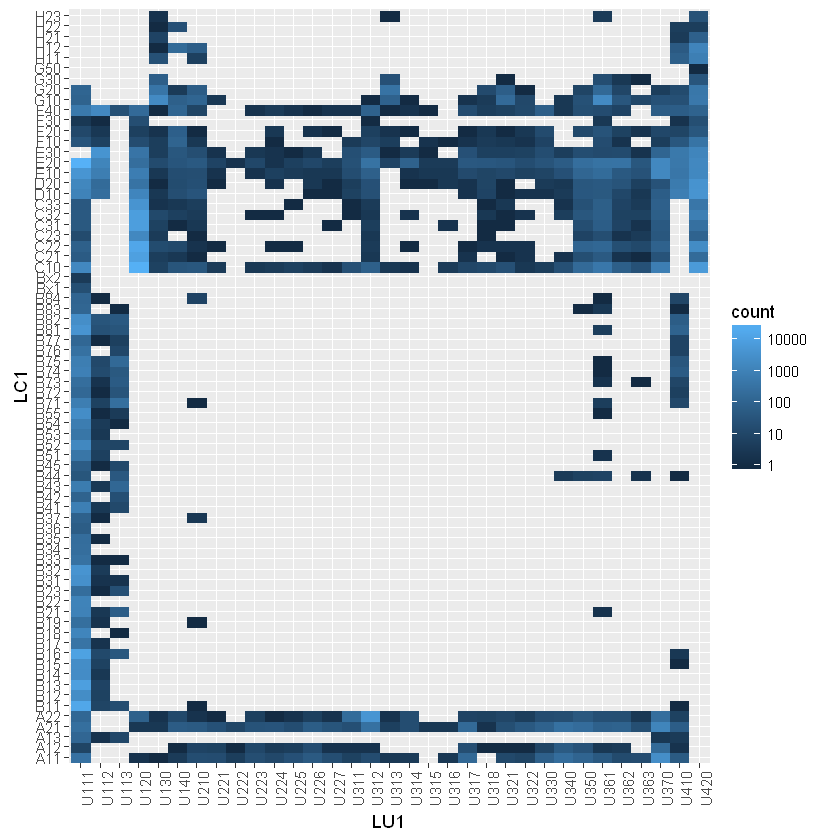

In [80]:
load_all("..")
lclu <- get_LC1xLU1_counts(lmd)

my_breaks = c(1, 10, 100, 1000, 10000)

ggplot(lclu, aes(LU1, LC1)) + geom_raster(aes(fill = count)) +
    scale_fill_gradient(name = "count", trans = "log", breaks = my_breaks, labels = my_breaks) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

Get the description of the LU x LC combination ... TODO!

In [14]:
# ...

For these cases it might also be interesting to get some additional statistical information.

In [15]:
# ...

##  Map of specific LC1 classes

In [69]:
subset_lmd_on_LC1 <- function(lmd, pattern="^B1[0-9]$", return_df=TRUE, areaGT2=TRUE) {
    
    idx <- logical(nrow(lmd@data))
    idx[grep(pattern, lmd@data$LC1)] <- TRUE
    
    if (areaGT2)
        idx <- idx & lmd@data$AREA_SIZE > 2 
    out <- lmd[idx, ]
    if (return_df)
        out <- out@data
    return(out)
}
plot_LC1_class <- function(lmd, pattern="^B1[0-9]$", areaGT2=TRUE, minCounts=NULL) {
    df <- subset_lmd_on_LC1(lmd, pattern=pattern, return_df=TRUE, areaGT2=areaGT2)
    tbl <- table(droplevels(df$LC1))
    if (!is.null(minCounts)) {
        keep <- names(tbl)[tbl>=minCounts]
        df <- df[df$LC1 %in% keep, ]
        tbl <- table(droplevels(df$LC1))
    }
    tbl["SUM"] <- sum(tbl)
    print(tbl)
    cat("\n")
    ggplot() +  
        # geom_polygon(data=gadm, aes(x=long, y=lat, group=group)) + # ???
        geom_point(data=df, aes(x=X_LONG, y=Y_LAT, color=LC1), size=.0001)
}

## By Main Categories

  A11   A12   A13   A21   A22   SUM 
 3888   366   153  3413  5393 13213 



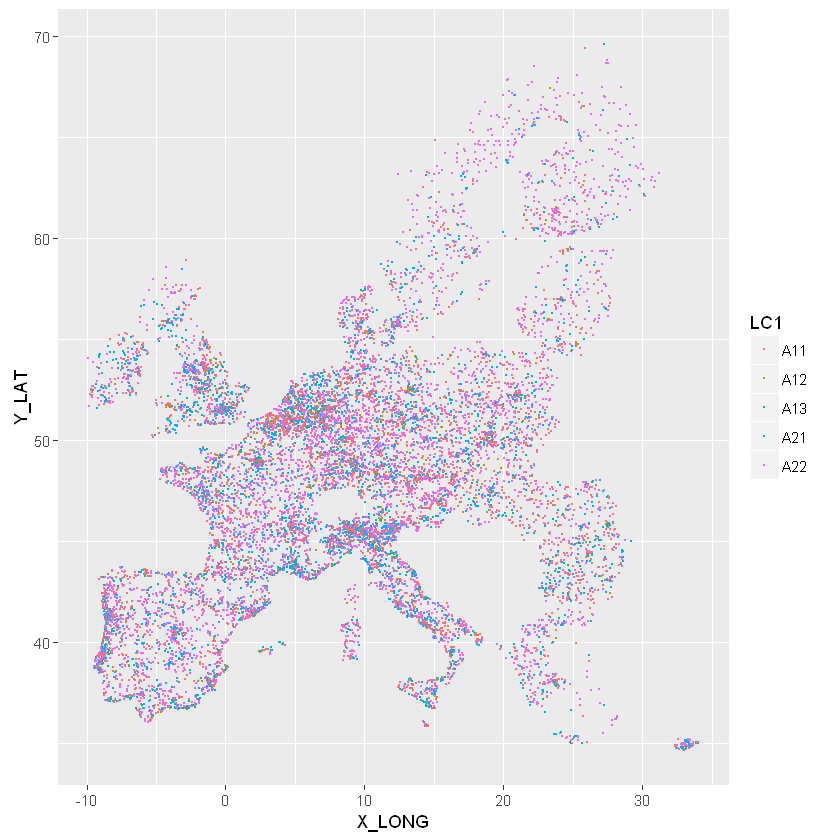

In [63]:
plot_LC1_class(lmd, pattern="A", areaGT2=FALSE)

  B11   B12   B13   B14   B15   B16   B17   B18   B19   B21   B22   B23   B31 
14655  2018  8235  1986  2020  9588   334  1231   217   756  1126   172  2839 
  B32   B33   B34   B35   B36   B37   B41   B42   B43   B44   B45   B51   B52 
 4100   281   156   208    36    79   776    72   449    22    28   347  1218 
  B53   B54   B55   B71   B72   B73   B74   B75   B76   B77   B81   B82   B83 
  354   570  2086   456    72   102   575   392   182    84  2667  1812    75 
  B84   Bx1   Bx2   SUM 
   80    16     1 62473 



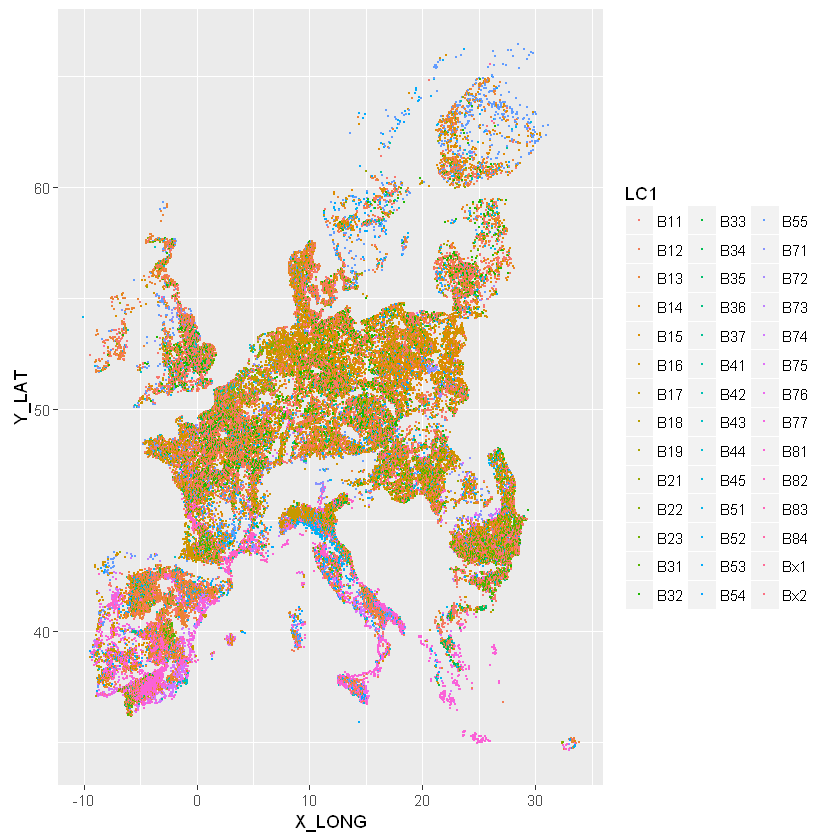

In [64]:
plot_LC1_class(lmd, pattern="B", areaGT2=TRUE)

  C10   C21   C22   C23   C31   C32   C33   SUM 
32668  9376 17069  1692  7944  8459  4198 81406 



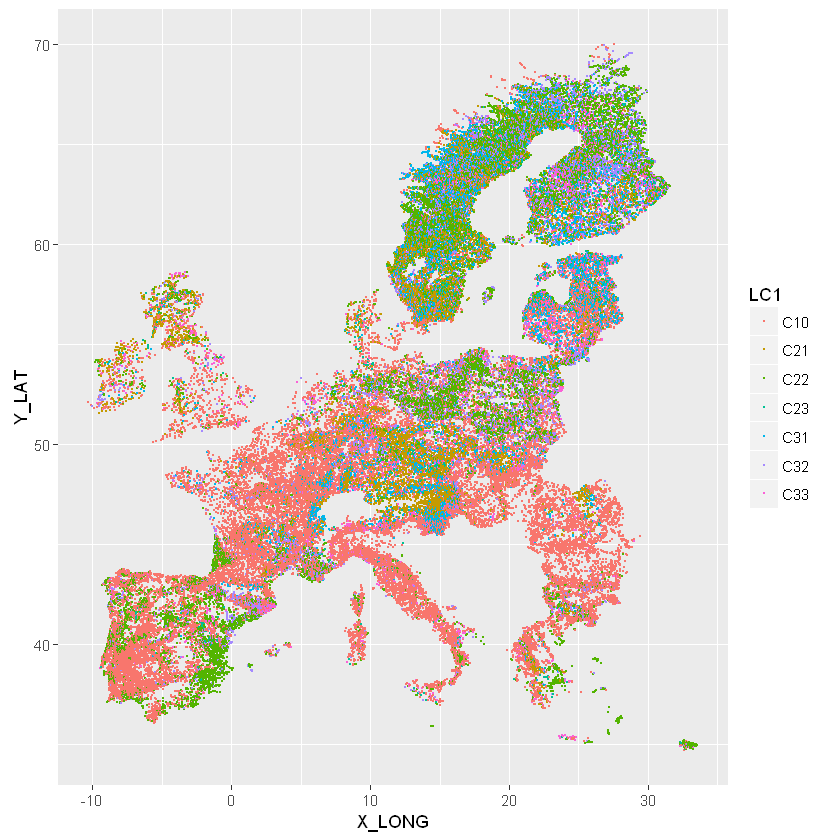

In [65]:
plot_LC1_class(lmd, pattern="C", areaGT2=TRUE)

  D10   D20   SUM 
 5559  5641 11200 


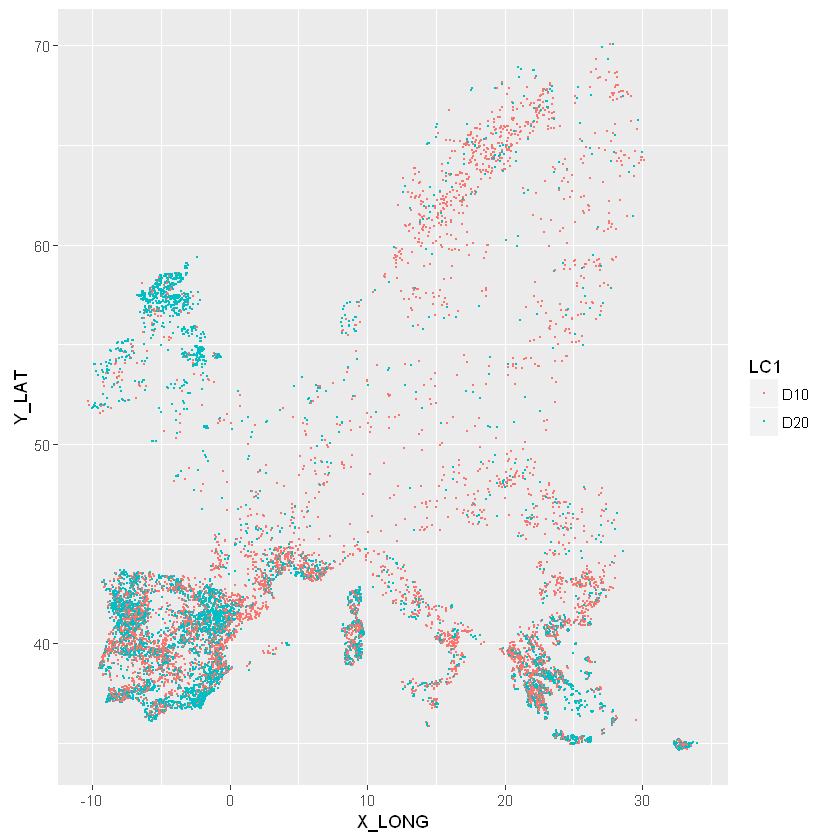

In [56]:
plot_LC1_class(lmd, pattern="D", areaGT2=TRUE)

  E10   E20   E30   SUM 
 5362 28778  3537 37677 


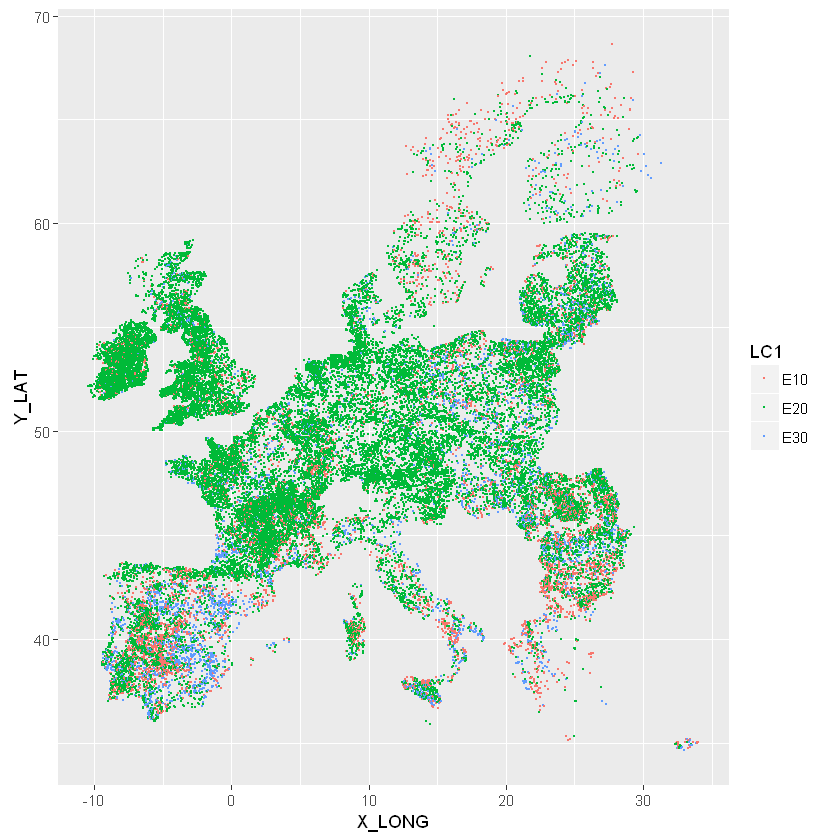

In [57]:
plot_LC1_class(lmd, pattern="E", areaGT2=TRUE)

 F10  F20  F30  F40  SUM 
 370  159   15 2265 2809 


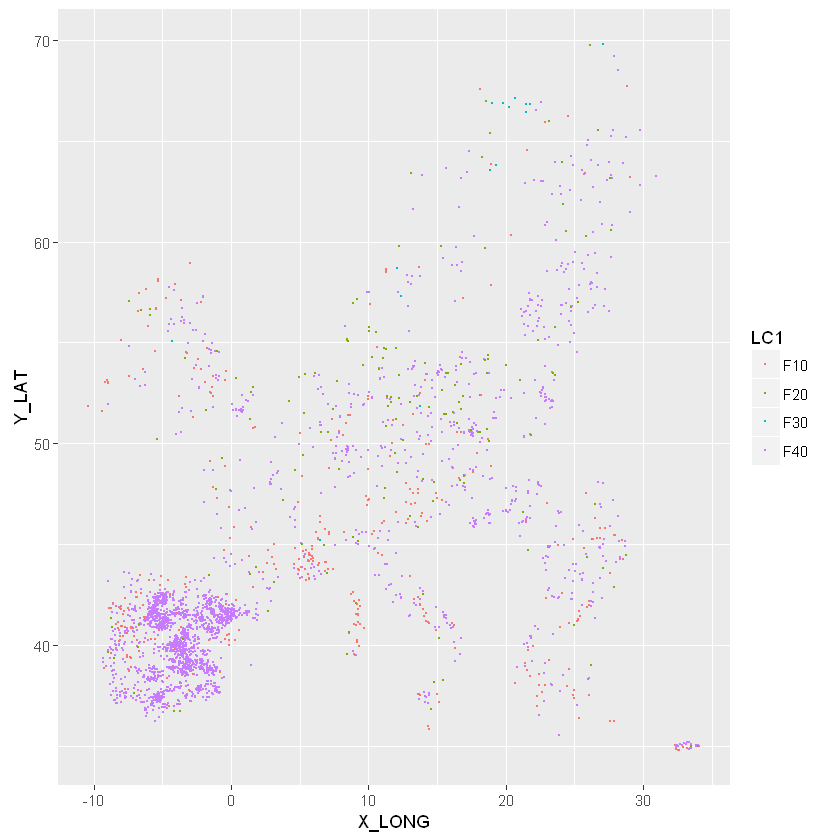

In [58]:
plot_LC1_class(lmd, pattern="F", areaGT2=TRUE)

 G10  G20  G30  G50  SUM 
4883 1629  152    1 6665 


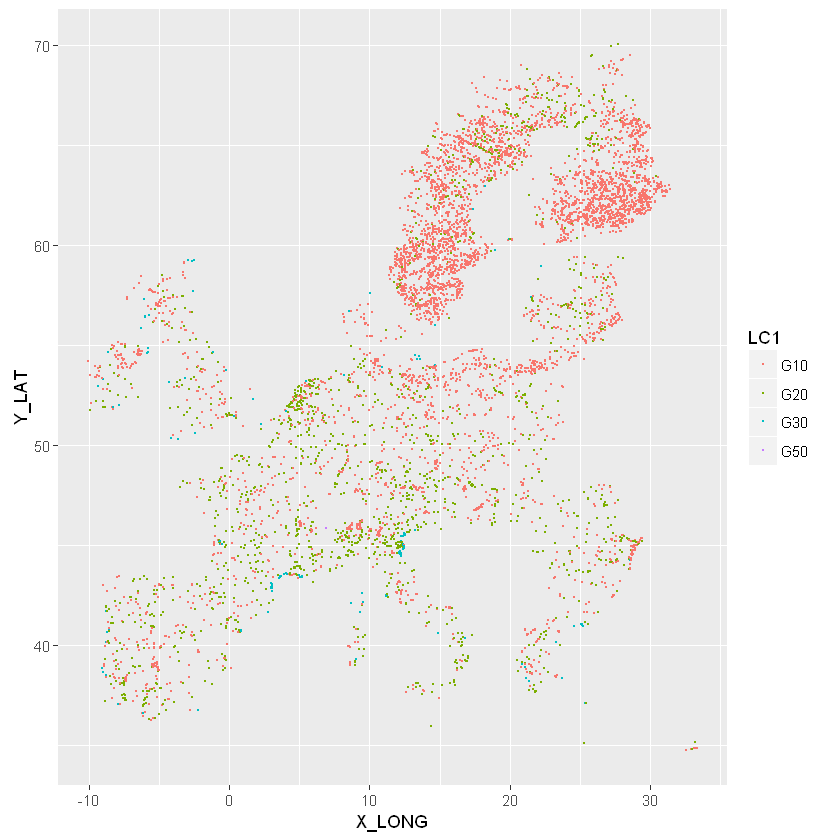

In [59]:
plot_LC1_class(lmd, pattern="G", areaGT2=TRUE)

 H11  H12  H21  H22  H23  SUM 
 671 1423   89   33   31 2247 



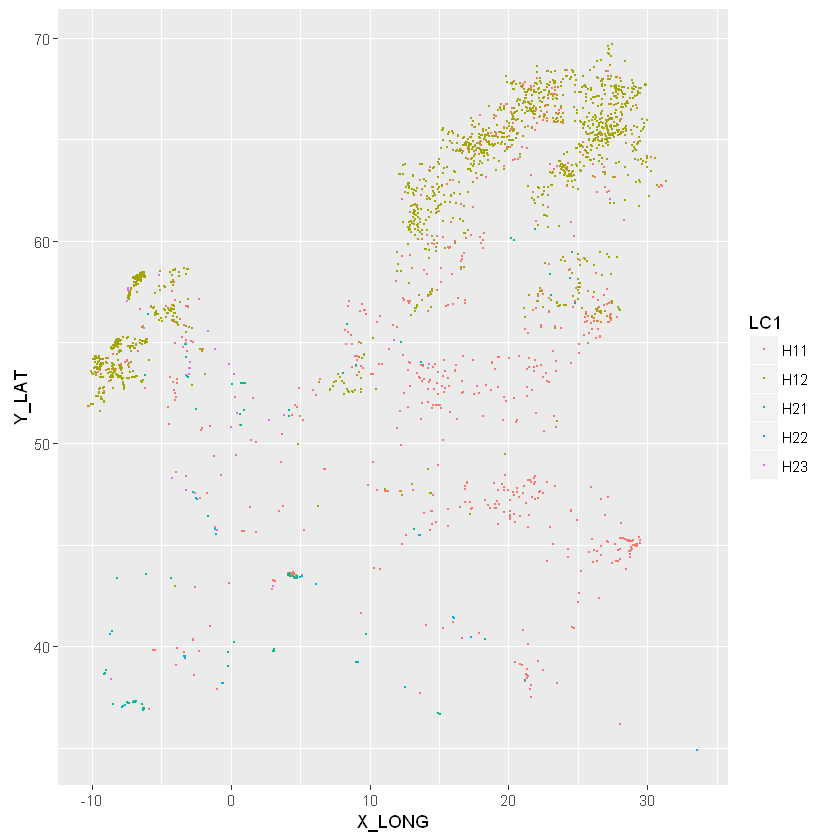

In [66]:
plot_LC1_class(lmd, pattern="H", areaGT2=TRUE)

### Crops with at least 1000 AREA>2 samples

  B11   B12   B13   B14   B15   B16   B18   B22   B31   B32   B52   B55   B81 
14655  2018  8235  1986  2020  9588  1231  1126  2839  4100  1218  2086  2667 
  B82   SUM 
 1812 55581 



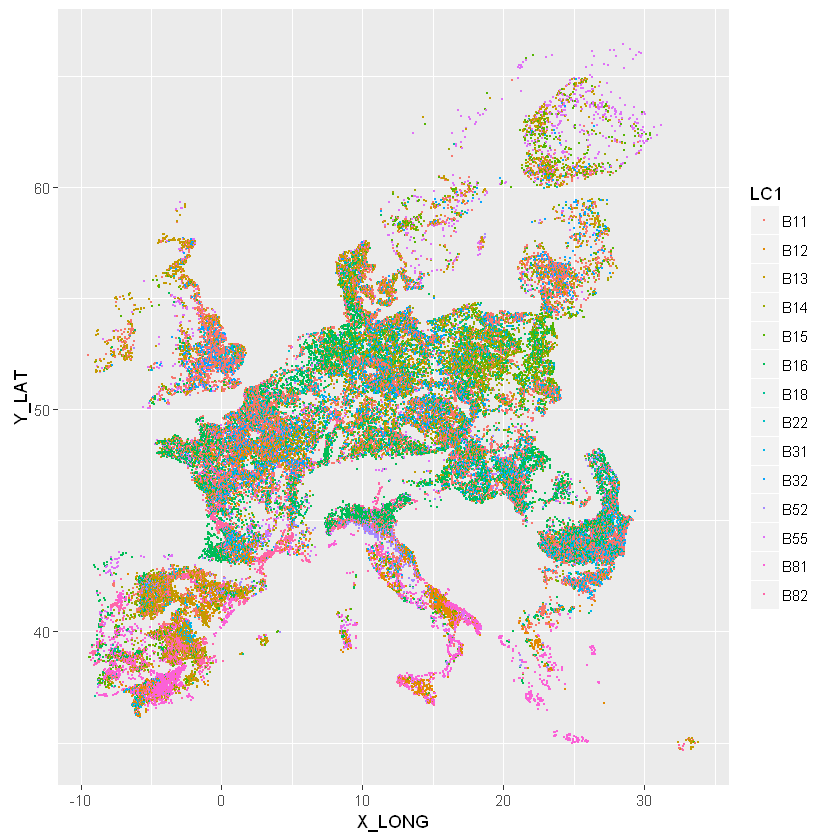

In [71]:
plot_LC1_class(lmd, pattern="B", areaGT2=TRUE, minCounts=1000)

#### Maize

 B16  SUM 
9588 9588 



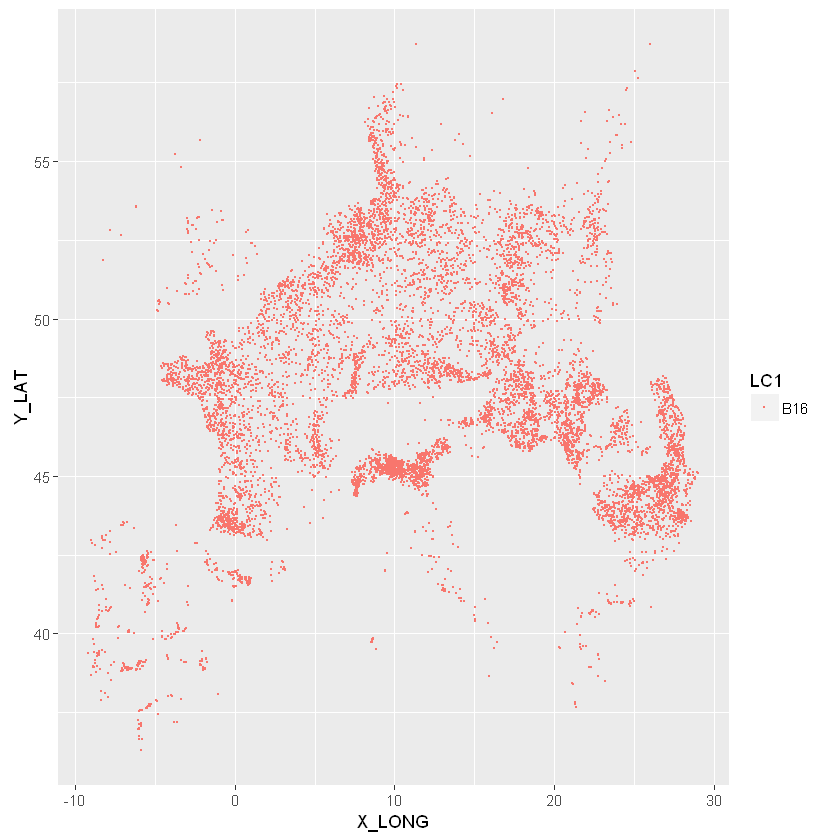

In [72]:
plot_LC1_class(lmd, pattern="B16", areaGT2=TRUE, minCounts=1000)

#### Sugar Beet

 B22  SUM 
1126 1126 



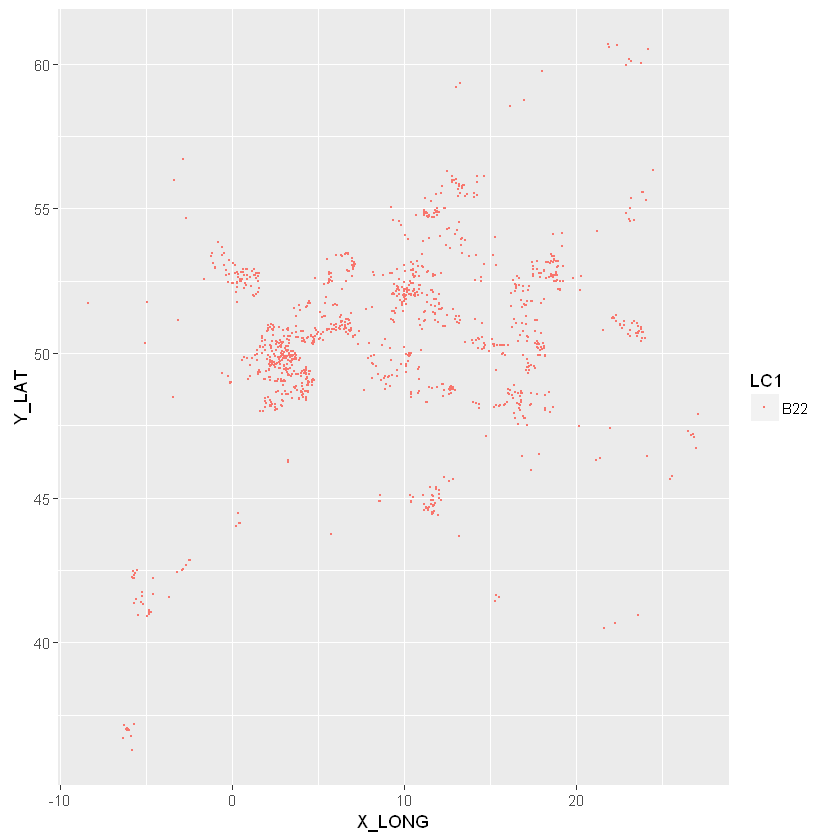

In [73]:
plot_LC1_class(lmd, pattern="B22", areaGT2=TRUE, minCounts=1000)

#### Sunflower

 B31  SUM 
2839 2839 



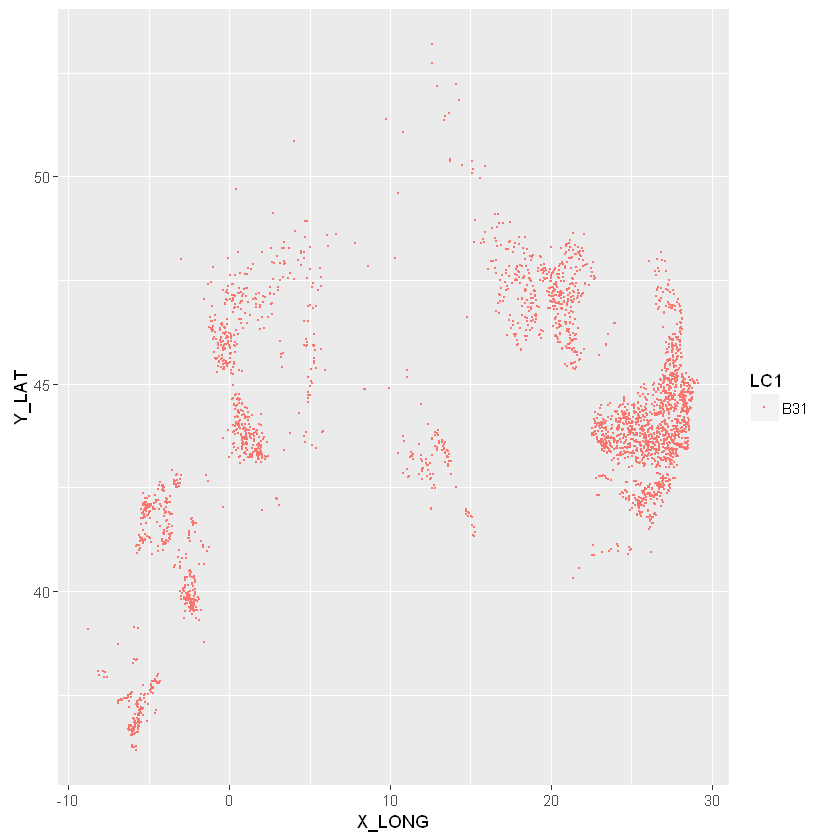

In [74]:
plot_LC1_class(lmd, pattern="B31", areaGT2=TRUE, minCounts=1000)

#### Rape and turnip rape

 B32  SUM 
4100 4100 



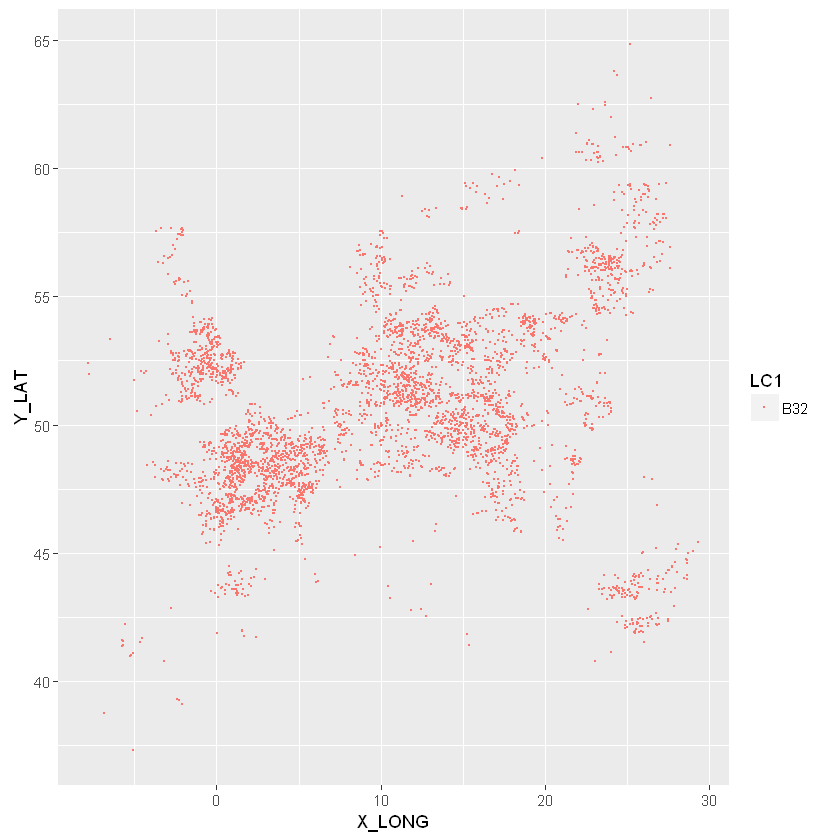

In [75]:
plot_LC1_class(lmd, pattern="B32", areaGT2=TRUE, minCounts=1000)

#### Lucerne

 B52  SUM 
1218 1218 



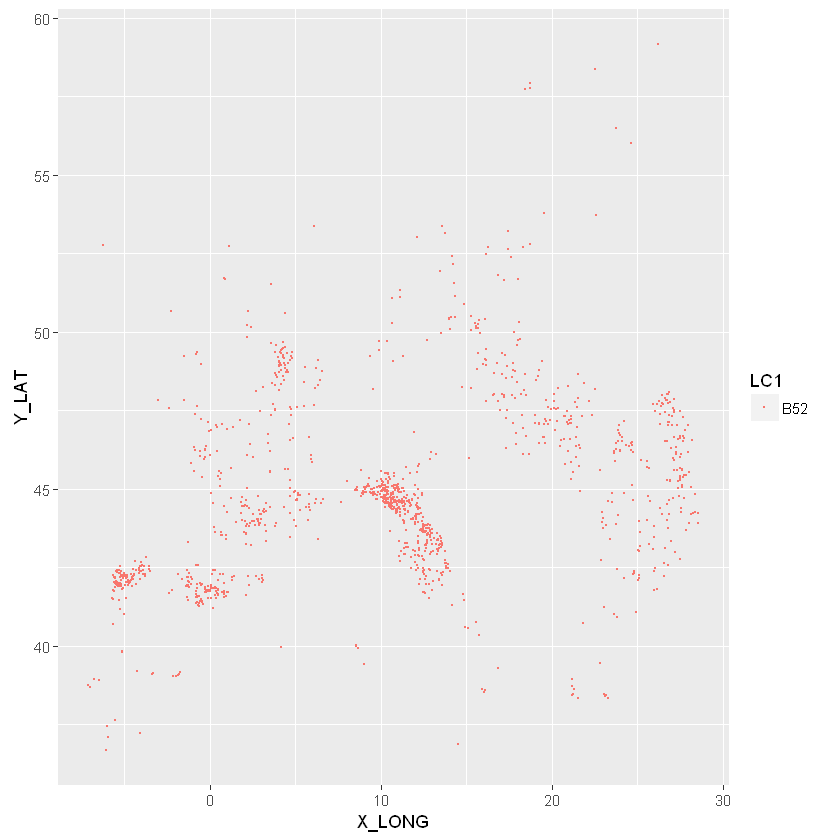

In [76]:
plot_LC1_class(lmd, pattern="B52", areaGT2=TRUE, minCounts=1000)

#### Olive groves

 B81  SUM 
2667 2667 



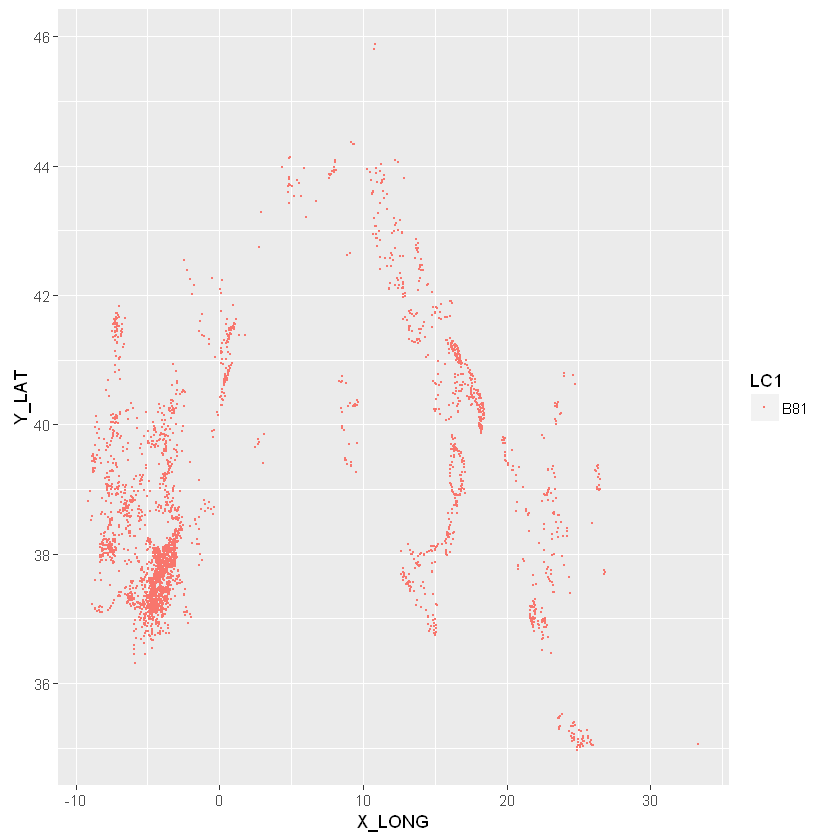

In [77]:
plot_LC1_class(lmd, pattern="B81", areaGT2=TRUE, minCounts=1000)

#### Vineyards

 B82  SUM 
1812 1812 



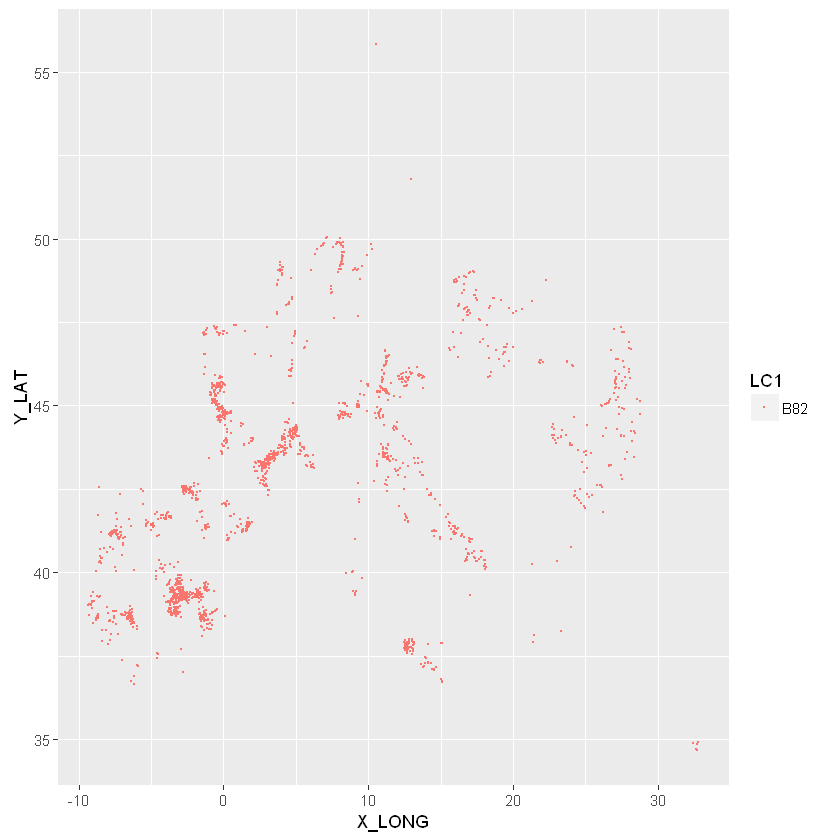

In [78]:
plot_LC1_class(lmd, pattern="B82", areaGT2=TRUE, minCounts=1000)